In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import *
from tqdm import tqdm

Using cupy


In [2]:
f_results = np.load("sim_results/f_results_ini_slope.npy")
print(f_results.shape)
# rates, species, d2q9_components, nx, ny
thickness_history = np.load("sim_results/thickness_history_ini_slope.npy")
print(thickness_history.shape)
# rates, history_points, nx

f_results_ns= np.load("sim_results/f_results_no_slope.npy")
thickness_history_ns = np.load("sim_results/thickness_history_no_slope.npy")

f_result_2x = np.load("sim_results/f_results_2x.npy")
thickness_history_2x = np.load("sim_results/thickness_history_2x.npy")

thickness_diffusion = np.load("sim_results/thickness_diffusion.npy")
print(thickness_diffusion.shape)

absorption_rates = np.linspace(5, 150, num = thickness_history.shape[0], endpoint = True)

(10, 2, 9, 400, 200)
(10, 31, 400)
(10, 400)


In [3]:
nx = thickness_history.shape[2]
non_absorb_mask = np.zeros(nx, dtype=bool)
gap = 32
width = 40
non_absorb_mask[nx//2 - gap//2 - width: nx//2- gap//2] = True
non_absorb_mask[nx//2 + gap//2 : nx//2 + gap//2 + width] = True

initialized with slope

85.55555555555556


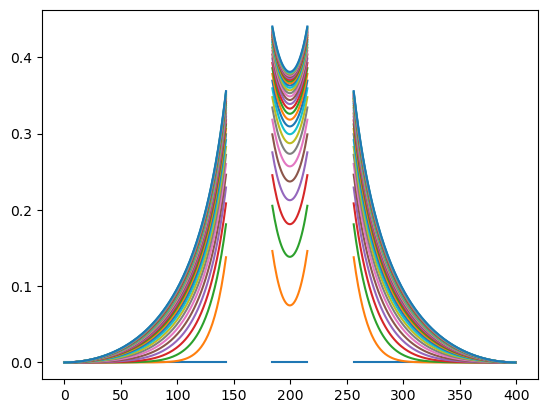

In [4]:
print(absorption_rates[5])
for i in range(thickness_history.shape[1]):
    thickness = thickness_history[5, i, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

initialized without slope

85.55555555555556


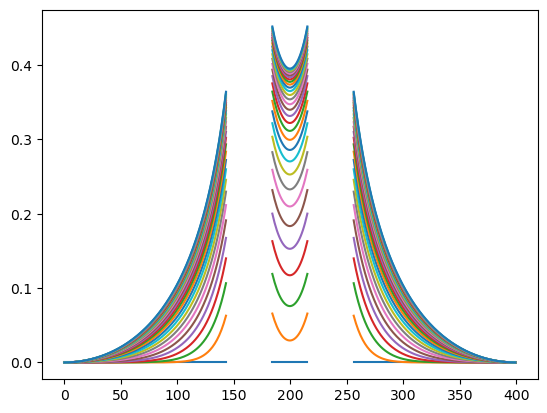

In [5]:
print(absorption_rates[5])
for i in range(thickness_history.shape[1]):
    thickness = thickness_history_ns[5, i, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

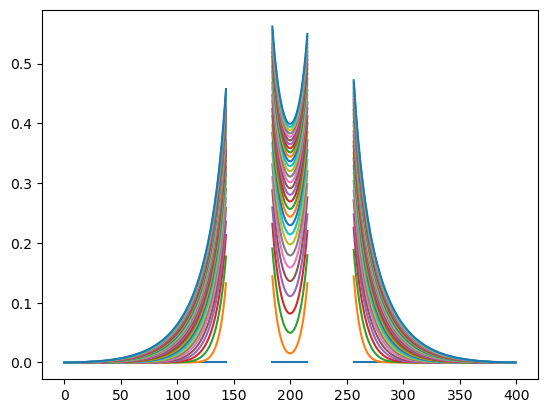

In [6]:
for i in range(thickness_history.shape[1]):
    thickness = thickness_history_2x[5, i, :][::2].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)

In [7]:
normalized_thickness_diffusion = []
for i in range(10):
    background_value = np.min(thickness_diffusion[i])
    extra_thickness = thickness_diffusion[i] - background_value #+ 1e-6
    normalized_thickness = extra_thickness/ background_value
    normalized_thickness_diffusion.append(normalized_thickness)

    slope = thickness_diffusion[i][1]-thickness_diffusion[i][0]
    measured_absorption = slope/thickness_diffusion[i][0]

normalized_thickness_diffusion = np.abs(normalized_thickness_diffusion)


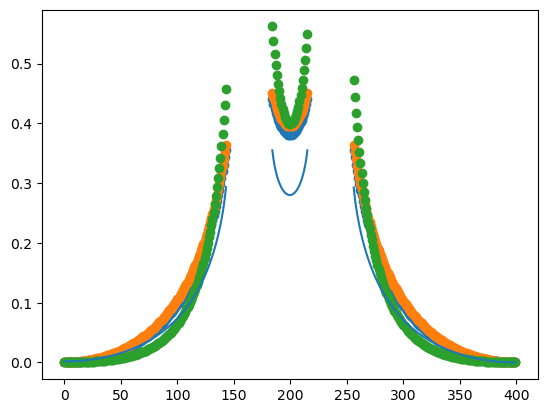

In [8]:
#LBM:
thickness = thickness_history[5, -1, :].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

thickness = thickness_history_ns[5, -1, :].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

thickness = thickness_history_2x[5, -1, :][::2].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

'''
for i in range(thickness_history.shape[0]):
    thickness = normalized_thickness_diffusion[i].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness)
'''
thickness = normalized_thickness_diffusion[5].copy()
thickness[non_absorb_mask==1] = np.nan
plt.plot(np.arange(nx), thickness)



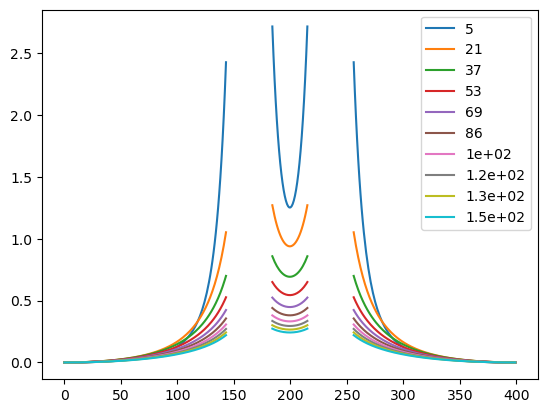

In [11]:
for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, label = f"{absorption_rates[i]:.2g}")
plt.legend()

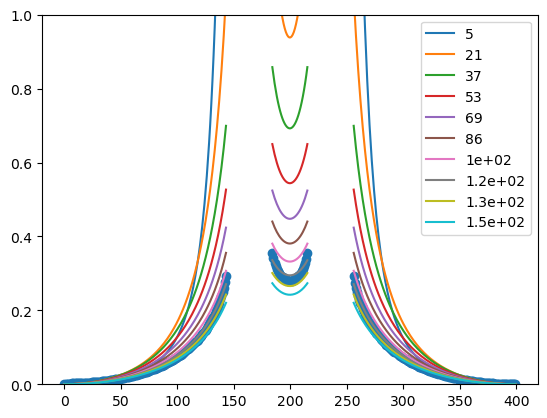

In [13]:
thickness = normalized_thickness_diffusion[5].copy()
thickness[non_absorb_mask==1] = np.nan
plt.scatter(np.arange(nx), thickness)

for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, label = f"{absorption_rates[i]:.2g}")

plt.ylim([0,1])
plt.legend()

(0.0, 1.0)

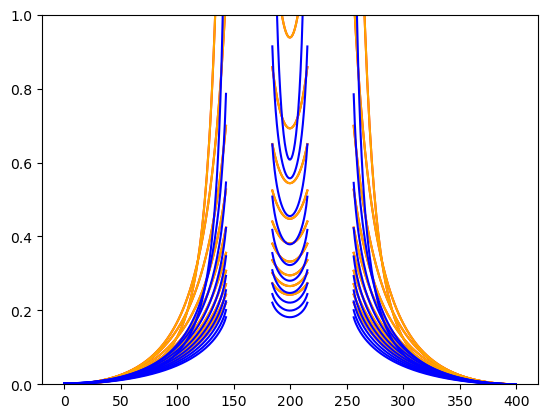

In [56]:
for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'r')

for i in range(thickness_history.shape[0]):
    thickness = thickness_history[i, -1, :].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'orange')

for i in range(thickness_history.shape[0]):
    thickness = normalized_thickness_diffusion[i].copy()
    thickness[non_absorb_mask==1] = np.nan
    plt.plot(np.arange(nx), thickness, color = 'b')

plt.ylim([0,1])

In [2]:
velocity_field = np.load("flow_field_b4_re620.npy")

In [3]:

print(velocity_field.shape)
# frames, components, species, nx, ny

specie_id = 0
vx = velocity_field[:, 0, specie_id, :, :]
vy = velocity_field[:, 1, specie_id, :, :]
print(vx.shape)

nx = velocity_field.shape[-2]
ny = velocity_field.shape[-1]
X, Y = np.meshgrid(range(nx), range(ny))
R = ny//6
cylinder = ((X-(nx/5.5))**2 + (Y-(ny/2))**2) < R**2
cylinder = cylinder.T

(376, 2, 2, 1675, 670)
(376, 1675, 670)


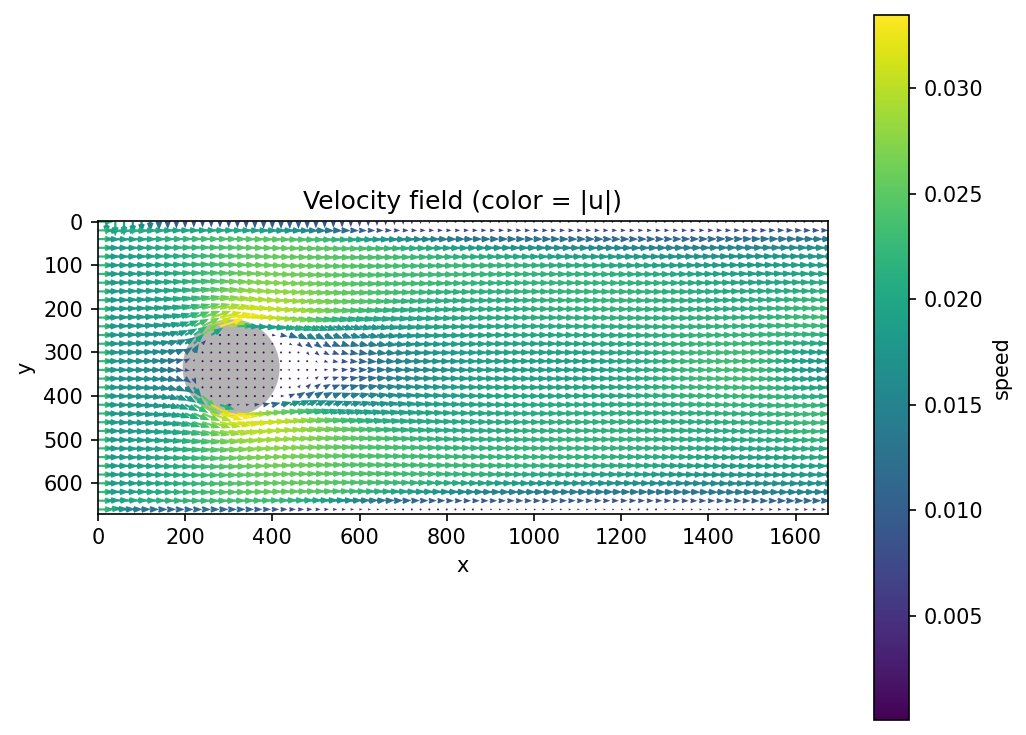

(<Figure size 1050x750 with 2 Axes>,
 <Axes: title={'center': 'Velocity field (color = |u|)'}, xlabel='x', ylabel='y'>)

In [4]:
vx_avg = np.mean(vx, axis = 0)
vy_avg = np.mean(vy, axis = 0)
plot_vector(vx_avg, vy_avg, 666, zoom = 0.15, skip = 20, shapes=cylinder, save = False)

In [5]:
def reynolds_stress(vx, vy, vx_avg, vy_avg):

    vx_diff = vx-vx_avg
    vy_diff = vy-vy_avg

    reynolds_stress_xx = np.mean(vx_diff*vx_diff, axis = 0)
    reynolds_stress_yy = np.mean(vy_diff*vy_diff, axis = 0)
    reynolds_stress_xy = np.mean(vx_diff*vy_diff, axis = 0)
    return reynolds_stress_xx, reynolds_stress_yy, reynolds_stress_xy

reynolds_stress_xx, reynolds_stress_yy, reynolds_stress_xy = reynolds_stress(vx, vy, vx_avg, vy_avg)

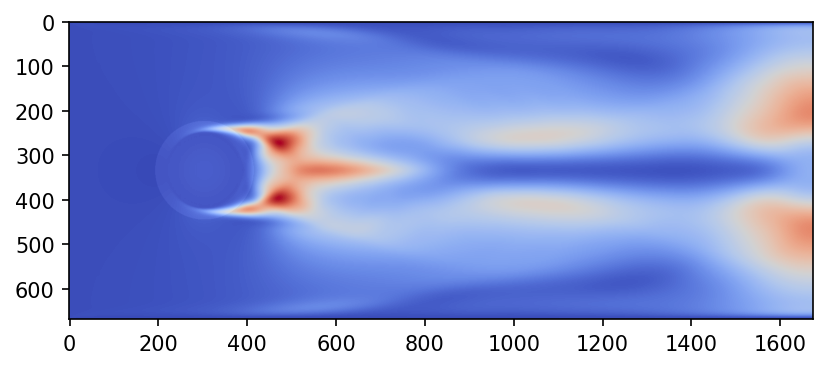

In [7]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(reynolds_stress_xx.T, cmap='coolwarm')
ax.imshow((cylinder).T, cmap="gray", alpha=0.05)

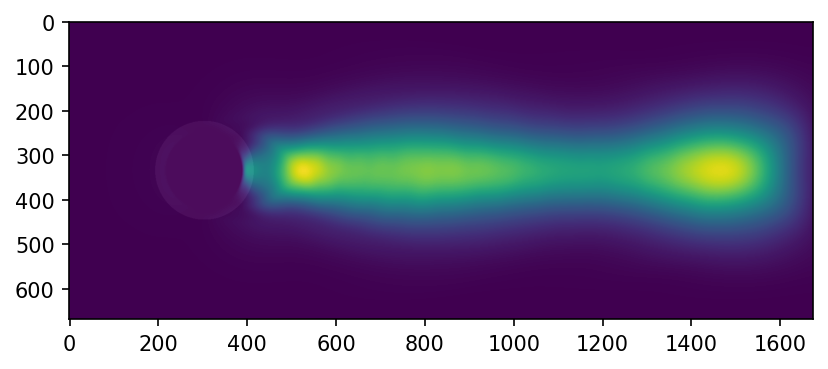

In [6]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(reynolds_stress_yy.T)
ax.imshow((cylinder).T, cmap="gray", alpha=0.05)

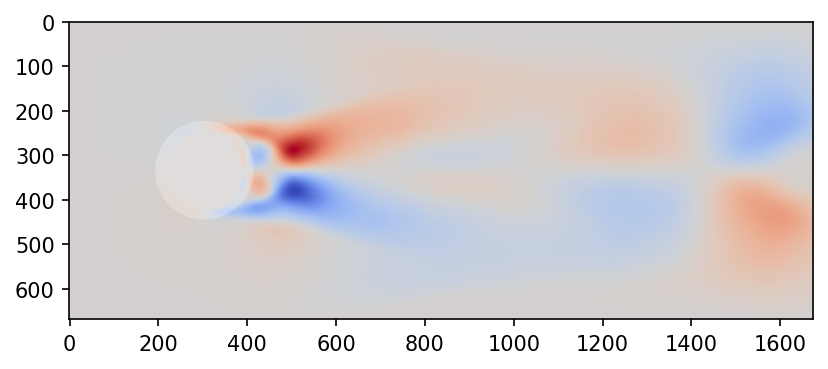

In [14]:
fig, ax = plt.subplots(dpi=150)
ax.imshow(reynolds_stress_xy.T, cmap='coolwarm')
ax.imshow((cylinder).T, cmap="gray", alpha=0.05)

In [10]:
from joblib import Parallel, delayed
def _single_stress(i):
    vx_short = velocity_field[i:, 0, specie_id, :, :]
    vy_short = velocity_field[i:, 1, specie_id, :, :]
    vx_avg_short = np.mean(vx, axis = 0)
    vy_avg_short = np.mean(vy, axis = 0)
    _, _, reynolds_stress_xy_short = reynolds_stress(vx_short, vy_short, vx_avg_short, vy_avg_short)
    difference = np.mean(abs(reynolds_stress_xy_short-reynolds_stress_xy))
    return difference

def diff_frame(velocity_field, reynolds_stress_xy, n_jobs = 2, backend='loky'):
    i = np.arange(velocity_field.shape[0]-1)
    results = Parallel(n_jobs = n_jobs, backend = backend)(
        delayed(_single_stress)(i)
        for i in i
    )
    diff = results
    return np.array(diff)

In [11]:
diff = diff_frame(velocity_field, reynolds_stress_xy)

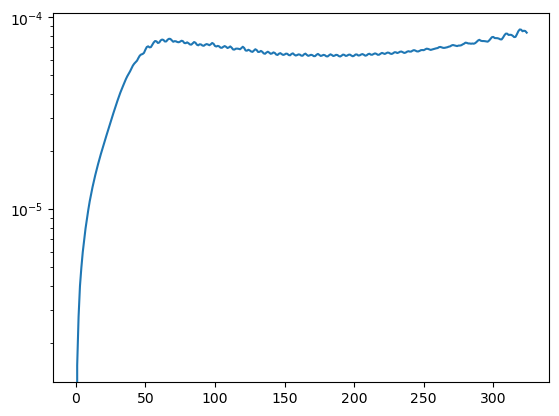

In [14]:
plt.plot(diff[:-50])
plt.yscale('log')